In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('Titanic.csv', encoding='latin-1', sep=',')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [34]:
# Funciones para gráficos simples de matplotlib

def frecuencia (relacion):
    plt.hist(df[relacion].dropna(), bins=20, color='skyblue')
    plt.xlabel(relacion)
    plt.ylabel('Frecuencia')
    plt.title('Distribución de ' + relacion + ' de los Pasajeros')
    plt.show()

def grafico_torta(categoria):
    cat_counts = df[categoria].value_counts()
    plt.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Distribución de ' + categoria + ' de los Pasajeros')
    plt.show()

def promedio(relacion1, relacion2):
    promedio_r1_r2 = df.groupby(relacion1)[relacion2].mean()
    promedio_r1_r2.plot(kind='bar')
    plt.xlabel(relacion1)
    plt.ylabel(relacion2)
    plt.title('Promedio de ' + relacion1 + ' por ' + relacion2)
    plt.show()

# Este no lo estoy usando de momento
def diferencias_por_clase(a_diferenciar):
    survival_by_class = df.groupby('Pclass')[a_diferenciar].value_counts().unstack()
    survival_by_class.plot(kind='bar', stacked=True)
    plt.xlabel('Clase')
    plt.ylabel('Cantidad')
    plt.title(a_diferenciar + ' por Clase')
    plt.legend(title=a_diferenciar, labels=['No', 'Sí'])
    plt.show()

In [31]:
# Funciones para los GRAFOS basados en la búsqueda de una expresión literal AKA apellido

def por_genero(nombre):
    global Data  # Indica que Data es una variable global
    Data = Data[Data['Name'].str.match(nombre)==True]
    print(Data)

    fig, ax = plt.subplots(figsize =(12,12))

    DG = nx.DiGraph()
    for i in range(0, len(Data)):
        DG.add_edge(Data.iloc[i]['Name'], Data.iloc[i]['Sex'])
        i = i + 1 
    genero = ["male", "female"]
    nx.draw(DG, with_labels=True, node_color= ['red' if node in genero else 'lightblue' for node in DG.nodes()])
    plt.show()

def por_clase(nombre):
    global Data  # Indica que Data es una variable global
    Data = Data[Data['Name'].str.match(nombre)==True]
    print(Data)

    fig, ax = plt.subplots(figsize =(12,12))

    DG = nx.DiGraph()
    for i in range(0, len(Data)):
        DG.add_edge(Data.iloc[i]['Name'], Data.iloc[i]['Pclass'])
        i = i + 1 
    clase = ["1", "2", "3"]
    nx.draw(DG, with_labels=True, node_color= ['red' if node in clase else 'lightblue' for node in DG.nodes()])
    plt.show()

def por_supervivencia(nombre):
    global Data  # Indica que Data es una variable global
    Data = Data[Data['Name'].str.match(nombre)==True]
    print(Data)

    fig, ax = plt.subplots(figsize =(12,12))

    DG = nx.DiGraph()
    for i in range(0, len(Data)):
        DG.add_edge(Data.iloc[i]['Name'], Data.iloc[i]['Survived'])
        i = i + 1 
    supervivencia = ["1", "0"]
    nx.draw(DG, with_labels=True, node_color= ['red' if node in supervivencia else 'lightblue' for node in DG.nodes()])
    plt.show()

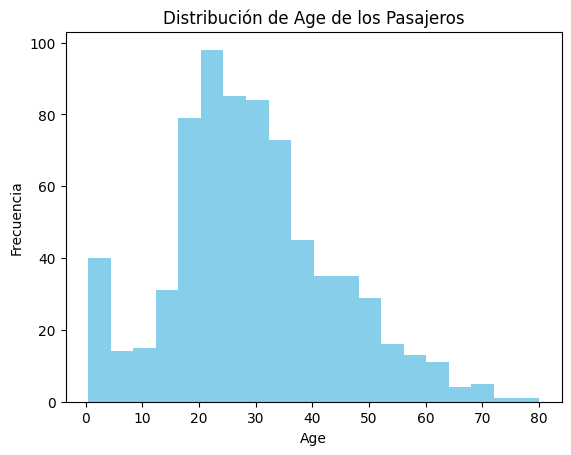

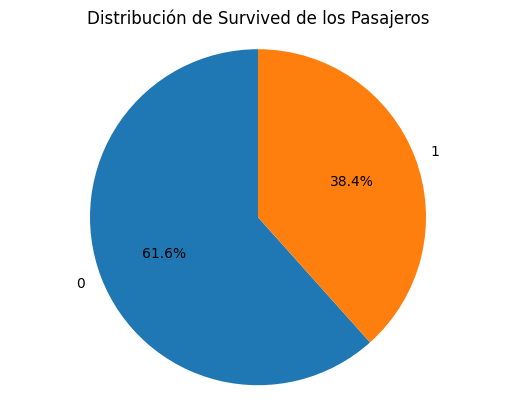

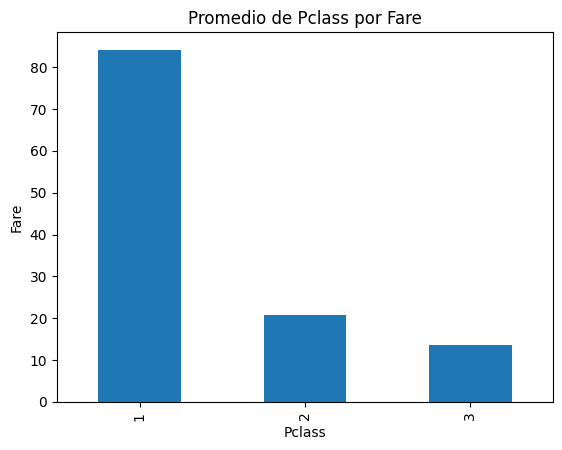

     PassengerId  Survived  Pclass  \
8              9         1       3   
172          173         1       3   
302          303         0       3   
597          598         0       3   
719          720         0       3   
783          784         0       3   
869          870         1       3   
888          889         0       3   

                                                  Name     Sex   Age  SibSp  \
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
172                       Johnson, Miss. Eleanor Ileen  female   1.0      1   
302                    Johnson, Mr. William Cahoone Jr    male  19.0      0   
597                                Johnson, Mr. Alfred    male  49.0      0   
719                       Johnson, Mr. Malkolm Joackim    male  33.0      0   
783                             Johnston, Mr. Andrew G    male   NaN      1   
869                    Johnson, Master. Harold Theodor    male   4.0      1   
888           Johnston, M

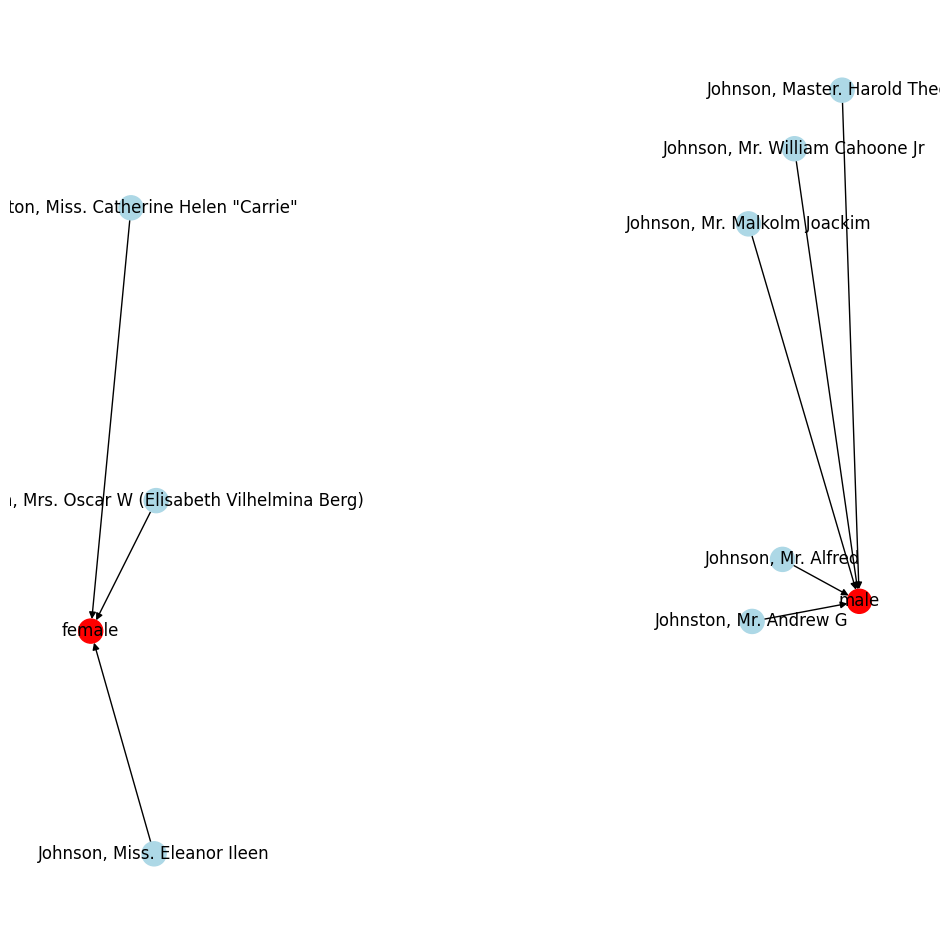

     PassengerId  Survived  Pclass                           Name     Sex  \
4              5         0       3       Allen, Mr. William Henry    male   
730          731         1       1  Allen, Miss. Elisabeth Walton  female   

      Age  SibSp  Parch  Ticket      Fare Cabin Embarked  
4    35.0      0      0  373450    8.0500   NaN        S  
730  29.0      0      0   24160  211.3375    B5        S  


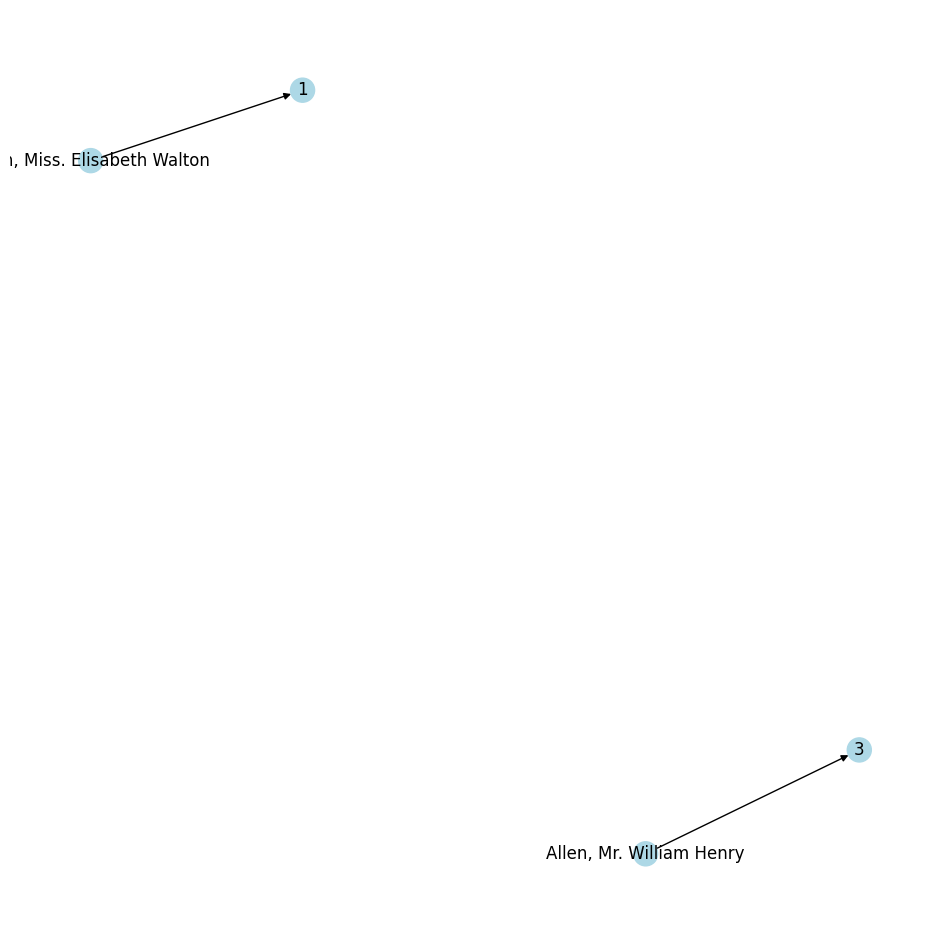

     PassengerId  Survived  Pclass  \
8              9         1       3   
172          173         1       3   
302          303         0       3   
597          598         0       3   
719          720         0       3   
783          784         0       3   
869          870         1       3   
888          889         0       3   

                                                  Name     Sex   Age  SibSp  \
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
172                       Johnson, Miss. Eleanor Ileen  female   1.0      1   
302                    Johnson, Mr. William Cahoone Jr    male  19.0      0   
597                                Johnson, Mr. Alfred    male  49.0      0   
719                       Johnson, Mr. Malkolm Joackim    male  33.0      0   
783                             Johnston, Mr. Andrew G    male   NaN      1   
869                    Johnson, Master. Harold Theodor    male   4.0      1   
888           Johnston, M

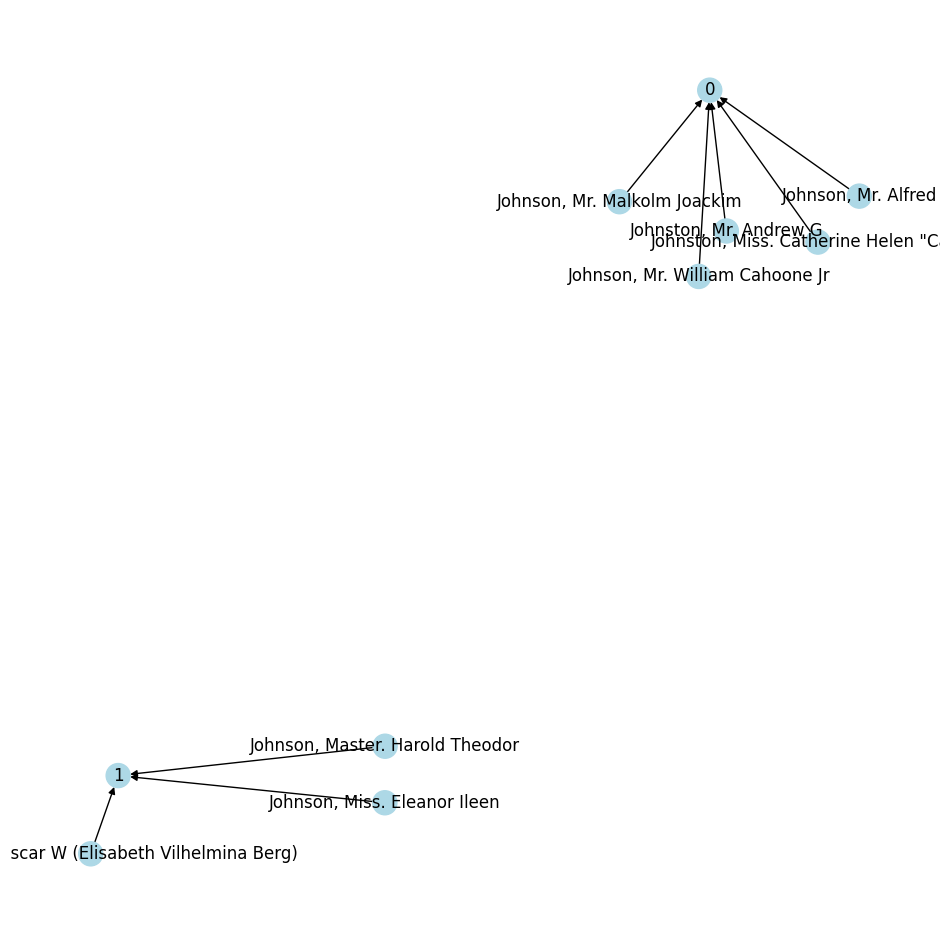

In [35]:
# Menú para el usuario

acceso_menu = True
while acceso_menu:
    menu_principal = int(input('Ingrese el número de la opción del menú que desee elegir:\n1. Generar un gráfico de frecuencia de la variable que usted elija\n2. Generar un gráfico de torta de la variable que usted elija\n3. Generar un promedio entre dos variables que usted elija\n4. Generar un grafo en base a un apellido particular y sus repeticiones en función de 3 variables ofrecidas\n5. Salir'))

    if(menu_principal == 1):
        relacion = input('Frecuencia que desea saber:')
        frecuencia(relacion)
    elif(menu_principal == 2):
        categoria = input('Sobre qué desea hacer el gráfico de torta:')
        grafico_torta(categoria)
    elif(menu_principal == 3):
        relacion1 = input('Calcule el promedio entre dos relaciones. Elija una de ellas:')
        relacion2 = input('Elija la otra')
        promedio(relacion1, relacion2)
    elif(menu_principal == 4): # Acceso a menú secundario que genera el GRAFO de acuerdo a 3 opciones
        menu_acceso = True
        while menu_acceso:
            Data = pd.read_csv('Titanic.csv')
            nombre = "^" + input('Ingrese el apellido que desea buscar:').capitalize() + ".*"

            menu = int(input('Elija el parámetro de búsqueda (número de la opción):\n1. Por género\n2. Por clase\n3. Por supervivencia\n4. Reiniciar la búsqueda\n5. Salir'))

            if(menu == 1):
                por_genero(nombre)
            elif(menu == 2):
                por_clase(nombre)
            elif(menu == 3):
                por_supervivencia(nombre)
            elif(menu == 5):
                menu_acceso = False
            else:
                print('Usted ha seleccionado reiniciar la búsqueda')
    elif(menu_principal == 5):
        acceso_menu = False
    else: acceso_menu = False